# Mixed Data
### When you have contained both numerical and categorical data. This type of data are called mixed data. If the data in the form like CB123, A9183 then we will make two new columns the first is categorical and other is numerical. The categorical contained categorical information and numerical column contained numerical information. If the value in the form like 1,7,3,A,C,5 then numerical value put into the numerical column and put NA in the corresponding categorical column.

In [95]:
import pandas as pd
import numpy as np

In [96]:
df=pd.read_csv('mixedvaraible.csv')

In [97]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [98]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passenger Travelling with')

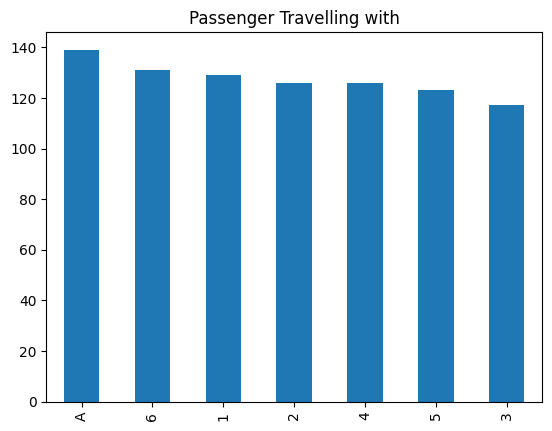

In [99]:
fig=df['number'].value_counts().plot.bar()
fig.set_title('Passenger Travelling with')

In [100]:
#extract numerical part
df['number_numerical']=pd.to_numeric(df['number'], errors='coerce', downcast='integer')

In [101]:
df

,Cabin,Ticket,number,Survived,number_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN
...,...,...,...,...,...
886,NaN,211536,3,0,3.0
887,B42,112053,3,1,3.0
888,NaN,W./C. 6607,1,0,1.0
889,C148,111369,2,1,2.0


In [102]:
df['number_categorical']=np.where(df['number_numerical'].isnull(), df['number'], np.nan)

In [103]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,3,0,3.0,NaN
887,B42,112053,3,1,3.0,NaN
888,NaN,W./C. 6607,1,0,1.0,NaN
889,C148,111369,2,1,2.0,NaN


In [104]:
#first case
#extract numerical part
df['cabin_num']=df['Cabin'].str.extract('(\d+)')
df['cabin_cat']=df['Cabin'].str[0]

In [105]:
value1, value2=round(df['number_numerical'].mean(), 2), df['number_categorical'].mode()
df['number_numerical']=df['number_numerical'].fillna(value1)
df['number_categorical']=df['number_categorical'].fillna(value2)

In [106]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.00,A,NaN,NaN
1,C85,PC 17599,3,1,3.00,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.00,NaN,NaN,NaN
3,C123,113803,3,1,3.00,NaN,123,C
4,NaN,373450,A,0,3.51,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.00,NaN,NaN,NaN
887,B42,112053,3,1,3.00,NaN,42,B
888,NaN,W./C. 6607,1,0,1.00,NaN,NaN,NaN
889,C148,111369,2,1,2.00,NaN,148,C


In [116]:
# #extract numerical value
df['Ticket_numerical']=df['Ticket'].apply(lambda x: x.split()[-1])
df['Ticket_numerical']=pd.to_numeric(df['Ticket_numerical'], errors='coerce', downcast='integer')

In [117]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_numerical
0,NaN,A/5 21171,5,0,5.00,A,NaN,NaN,21171.0
1,C85,PC 17599,3,1,3.00,NaN,85,C,17599.0
2,NaN,STON/O2. 3101282,6,1,6.00,NaN,NaN,NaN,3101282.0
3,C123,113803,3,1,3.00,NaN,123,C,113803.0
4,NaN,373450,A,0,3.51,A,NaN,NaN,373450.0
...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.00,NaN,NaN,NaN,211536.0
887,B42,112053,3,1,3.00,NaN,42,B,112053.0
888,NaN,W./C. 6607,1,0,1.00,NaN,NaN,NaN,6607.0
889,C148,111369,2,1,2.00,NaN,148,C,111369.0


In [119]:
#extract the part as a category
df['ticket_cat']=df['Ticket'].apply(lambda x: x.split()[0])

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_numerical,ticket_cat
0,NaN,A/5 21171,5,0,5.00,A,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.00,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.00,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.00,NaN,123,C,113803.0,113803
4,NaN,373450,A,0,3.51,A,NaN,NaN,373450.0,373450
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.00,NaN,NaN,NaN,211536.0,211536
887,B42,112053,3,1,3.00,NaN,42,B,112053.0,112053
888,NaN,W./C. 6607,1,0,1.00,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.00,NaN,148,C,111369.0,111369


In [124]:
df['ticket_cat']=np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

In [125]:
df

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_numerical,ticket_cat
0,NaN,A/5 21171,5,0,5.00,A,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.00,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.00,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.00,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,3.51,A,NaN,NaN,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,3,0,3.00,NaN,NaN,NaN,211536.0,NaN
887,B42,112053,3,1,3.00,NaN,42,B,112053.0,NaN
888,NaN,W./C. 6607,1,0,1.00,NaN,NaN,NaN,6607.0,W./C.
889,C148,111369,2,1,2.00,NaN,148,C,111369.0,NaN
